In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
%matplotlib inline

In [11]:
raw = pd.DataFrame()
raw = pd.read_csv("AMD.csv")
raw[:10]
# ticker = 'AMZN'
# data = pd.DataFrame()
# data[ticker] = wb.DataReader(ticker, data_source='stooq', start='2010-1-1')['Adj Close']
# data[ticker][:10]

,Close
Date,
2022-03-30,119.22
2022-03-29,123.23
2022-03-28,120.24
2022-03-25,119.67
2022-03-24,120.53
...,...
2012-04-09,7.75
2012-04-05,7.87
2012-04-04,7.81


In [12]:
raw.set_index(pd.DatetimeIndex(raw['Date']), inplace=True)
data = raw.loc[:," Close"]
data.columns = ["Close"]
data = pd.DataFrame(data)
data.head()

,Close
Date,
2022-03-30,119.22
2022-03-29,123.23
2022-03-28,120.24
2022-03-25,119.67
2022-03-24,120.53


In [13]:
log_returns = np.log(1 + data.pct_change())
log_returns.head()

,Close
Date,
2022-03-30,NaN
2022-03-29,0.033082
2022-03-28,-0.024563
2022-03-25,-0.004752
2022-03-24,0.007161


/home/danielyct/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

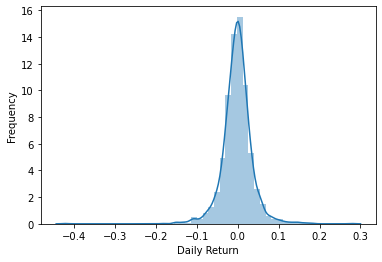

In [14]:
sns.distplot(log_returns.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")

<AxesSubplot:xlabel='Date'>

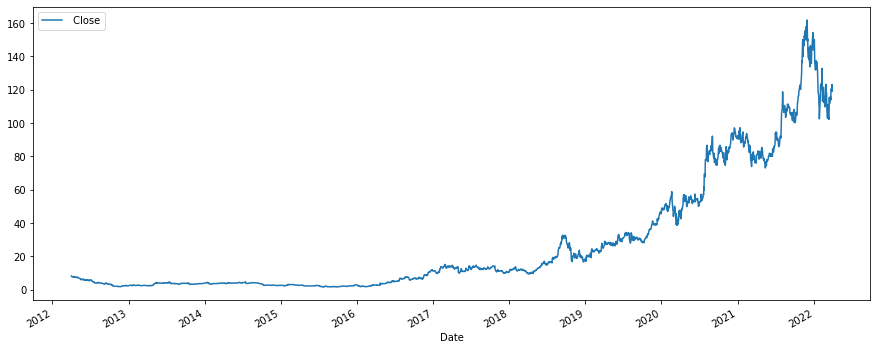

In [15]:
data.plot(figsize=(15,6))

<AxesSubplot:xlabel='Date'>

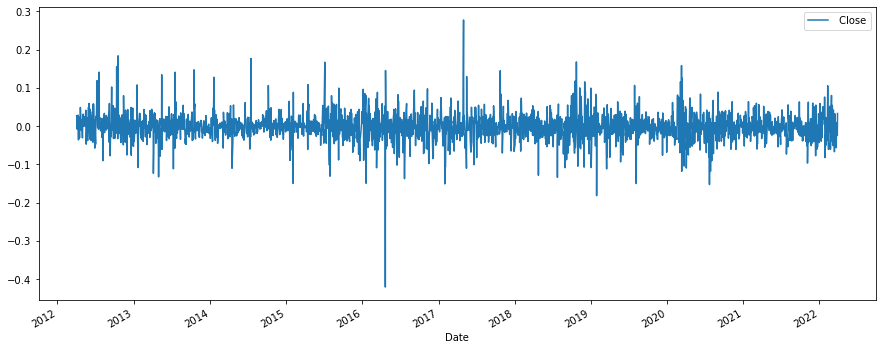

In [16]:
log_returns.plot(figsize=(15,6))

In [17]:
u = log_returns.mean()
var = log_returns.var()

$$
{drift} = {u} - \frac{1}{2} * {var}
$$

In [18]:
drift = u - (0.5*var)
drift

 Close   -0.001722
dtype: float64

In [19]:
stddev = log_returns.std()

In [20]:
x = np.random.rand(10,2)
x

array([[0.60569328, 0.46746165],
       [0.62007044, 0.41219144],
       [0.3539473 , 0.39280495],
       [0.81420541, 0.8992886 ],
       [0.80677114, 0.97734222],
       [0.93185702, 0.29248223],
       [0.29094337, 0.36732791],
       [0.51848558, 0.4756746 ],
       [0.38840255, 0.35949523],
       [0.99951334, 0.3264009 ]])

In [21]:
norm.ppf(x)

array([[ 0.26811158, -0.08165218],
       [ 0.3056658 , -0.22191137],
       [-0.3746852 , -0.27201575],
       [ 0.89350056,  1.27750845],
       [ 0.86605918,  2.00171353],
       [ 1.48976527, -0.54614763],
       [-0.55063086, -0.33893883],
       [ 0.04635308, -0.06101257],
       [-0.28348497, -0.35980834],
       [ 3.29812775, -0.4498733 ]])

In [22]:
Z = norm.ppf(np.random.rand(50,10000))
Z

array([[ 6.49258486e-01, -1.04677906e-01,  2.46484566e-01, ...,
        -7.40904012e-01, -2.11542749e-01,  7.43229232e-02],
       [-2.03020821e+00,  1.49120508e+00, -5.32946090e-01, ...,
         1.31645829e+00, -3.53959194e-01, -1.70994960e-01],
       [ 1.11674792e+00, -2.62464456e-01,  1.03020115e+00, ...,
         2.75945224e-01, -1.23408584e-02,  8.40167654e-01],
       ...,
       [-1.54136633e-03, -1.32636518e+00,  1.51257597e+00, ...,
         1.09332814e+00, -1.15224514e-01,  7.43028811e-01],
       [-8.13005446e-02, -3.29316985e-01,  6.32438639e-01, ...,
        -9.60712443e-02, -2.05832598e-01,  1.83641070e-01],
       [ 2.01732976e-01, -5.59093194e-01,  3.87725437e-01, ...,
         8.05099982e-01,  1.31288239e+00,  1.23812532e+00]])

In [23]:
t_intervals = 1000
iterations = 10

$$
{daily}_{returns} = {e^r}
$$

$$
{r}={drift}+{stdev*z}
$$

In [24]:
daily_returns = np.exp(drift.values + stddev.values * norm.ppf(np.random.rand(50,1000)))

In [25]:
daily_returns

array([[0.99360688, 0.91954988, 0.94904031, ..., 0.98012496, 1.00147995,
        0.99896786],
       [0.99611391, 1.02229325, 1.01072394, ..., 1.00229988, 1.01551872,
        1.00979302],
       [1.00646516, 1.06215719, 0.96339933, ..., 1.02575115, 1.00655203,
        1.01524935],
       ...,
       [0.97901398, 0.95911685, 0.98039358, ..., 0.98793768, 1.01973211,
        1.06672835],
       [0.98566587, 1.02897818, 1.03539034, ..., 1.02786351, 0.9781652 ,
        1.01632529],
       [1.01985942, 1.05043659, 1.00083995, ..., 0.94266683, 1.02322823,
        1.00955469]])

---

In [26]:
S0 = data.iloc[-1]
S0

 Close    8.2
Name: 2012-04-02 00:00:00, dtype: float64

In [27]:
price_list = np.zeros_like(daily_returns)

In [28]:
price_list.shape

(50, 1000)

In [29]:
price_list[0] = S0
price_list

array([[8.2, 8.2, 8.2, ..., 8.2, 8.2, 8.2],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [30]:
for t in range(1,50):
    price_list[t] = price_list[t-1]*daily_returns[t]

In [31]:
price_list.shape

(50, 1000)

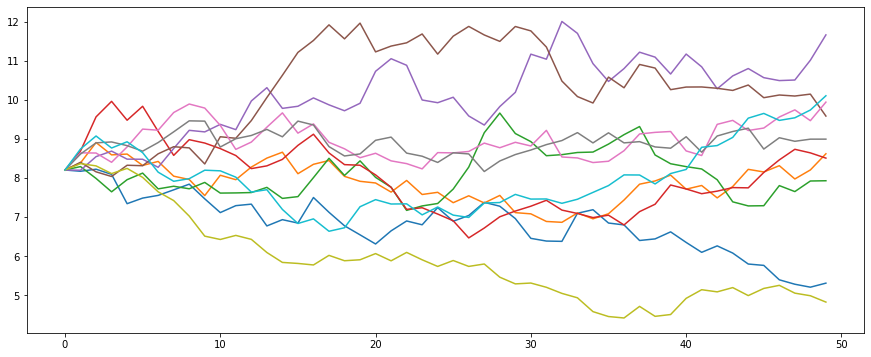

In [32]:
plt.figure(figsize=(15,6))
plt.plot(pd.DataFrame(price_list).iloc[:,0:10])

/home/danielyct/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Price after 50 days')

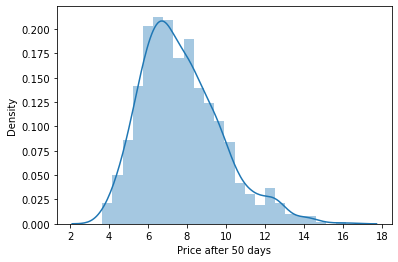

In [33]:
sns.distplot(pd.DataFrame(price_list).iloc[-1])
plt.xlabel("Price after 50 days")

In [34]:
df = pd.DataFrame(price_list)

In [35]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,8.200000,8.200000,8.200000,8.200000,8.200000,8.200000,8.200000,8.200000,8.200000,8.200000,...,8.200000,8.200000,8.200000,8.200000,8.200000,8.200000,8.200000,8.200000,8.200000,8.200000
1,8.168134,8.382805,8.287936,8.686792,8.194803,8.397636,8.639442,8.609125,8.364067,8.737916,...,8.030046,8.540262,8.468789,8.073735,8.057418,9.021731,7.809174,8.218859,8.327254,8.280303
2,8.220942,8.903856,7.984592,9.560395,8.542221,8.153534,8.634990,8.895517,8.305814,9.070655,...,8.389466,9.203801,8.537499,7.824140,8.157126,8.912992,7.991747,8.430504,8.381814,8.406572
3,8.088701,8.587627,7.642089,9.957276,8.683403,8.034170,8.397992,8.918490,8.108597,8.763267,...,8.123717,8.992013,8.048052,7.898268,8.112419,8.632175,8.223708,8.361231,8.352110,8.580688
4,7.338340,8.608140,7.952735,9.474414,8.477986,8.322017,8.790883,8.823809,8.241365,8.922533,...,7.909697,9.075897,8.145296,8.288804,8.373760,8.659780,8.502677,8.152233,8.289775,9.246244


In [36]:
import seaborn as sns

/home/danielyct/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/danielyct/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/danielyct/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

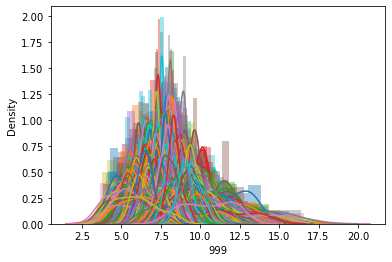

In [37]:
for i in range(len(df.columns)):
    sns.distplot(df[i])